# Classification report analysis

### Target dataset

In [104]:
TARGET_DATASET = 'Test'
TARGET_DATASET

'Test'

Get project root

In [105]:
path = !pwd
report_path = '{}/{}/{}'.format('/'.join(path[0].split('/')[:-1]), 'reports', TARGET_DATASET)
report_path

Read all reports file

In [68]:
import os
report_file_list = [file for file in os.listdir(report_path) if file.split('.')[-1] == 'json']
report_file_list

In [108]:
import json

CLASSIFIER_NAME = {'DecisionTreeClassifier': 'DecisionTree',
				   'SVC': 'SVM',
				   'MultinomialNB': 'MultinomialNB'
				   }
# Read all data
report_list = []
for report_file in report_file_list:	
	with open('{}/{}'.format(report_path, report_file)) as file:
		data = json.load(file)
		# Save data
		out = dict()
		out['classifier'] = CLASSIFIER_NAME[data['classifier']]
		out['features'] = data['features']
		out['confusion-matrix'] = data['overall']['confusion-matrix']
		out.update(data['overall']['report'])
		report_list.append(out)
# Radix sort
report_list.sort(key=lambda x: x['classifier'])
report_list.sort(key=lambda x: x['features'])
report_list.sort(key=lambda x: len(x['features'].split('-')))
report_list[:1]

[{'classifier': 'DecisionTree',
  'features': 'bow',
  'confusion-matrix': [[288.0, 12.0], [53.0, 47.0]],
  'False': {'precision': 0.8453757027286439,
   'recall': 0.9600327681577682,
   'f1-score': 0.8979281351602003,
   'support': 300.0},
  'True': {'precision': 0.8261904761904763,
   'recall': 0.47527472527472525,
   'f1-score': 0.5767740429505135,
   'support': 100.0},
  'macro avg': {'precision': 0.8357830894595601,
   'recall': 0.7176537467162467,
   'f1-score': 0.737351089055357,
   'support': 400.0},
  'weighted avg': {'precision': 0.8425924994123524,
   'recall': 0.8375,
   'f1-score': 0.818925604710507,
   'support': 400.0},
  'accuracy': 0.8375}]

In [110]:
from pandas.io.json import json_normalize
df = json_normalize(report_list)
df.head(3)

,False.f1-score,False.precision,False.recall,False.support,True.f1-score,True.precision,True.recall,True.support,accuracy,classifier,confusion-matrix,features,macro avg.f1-score,macro avg.precision,macro avg.recall,macro avg.support,weighted avg.f1-score,weighted avg.precision,weighted avg.recall,weighted avg.support
0,0.897928,0.845376,0.960033,300.0,0.576774,0.826190,0.475275,100.0,0.8375,DecisionTree,"[[288.0, 12.0], [53.0, 47.0]]",bow,0.737351,0.835783,0.717654,400.0,0.818926,0.842592,0.8375,400.0
1,0.895149,0.838300,0.962931,300.0,0.555411,0.838333,0.444963,100.0,0.8325,MultinomialNB,"[[289.0, 11.0], [56.0, 44.0]]",bow,0.725280,0.838317,0.703947,400.0,0.811144,0.840028,0.8325,400.0
2,0.901882,0.842110,0.973236,300.0,0.574834,0.875714,0.453297,100.0,0.8425,SVM,"[[292.0, 8.0], [55.0, 45.0]]",bow,0.738358,0.858912,0.713266,400.0,0.821264,0.852525,0.8425,400.0


Evaluate features data

In [232]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

reports_list = ['macro avg.precision', 'macro avg.recall', 'macro avg.f1-score', 'accuracy']
features_list = df['features'].unique()

def evaluate_features_data(classifier):
	plot_values = []
	for feature in features_list:
		values = []
		for report in reports_list:
			value = df[((df['features'] == feature) & (df['classifier'] == classifier))][report]
			values.append(float(value))
		plot_values.append(values)
	plot_values = np.transpose(np.array(plot_values))
	return plot_values

def plot_features(plot_values, classifier_name):
	# Figure
	fig, ax = plt.subplots(figsize=(20, 10))
	bar_width = 0.75
	# Axis idx
	indx = np.arange(len(features_list)) * 4.5
	yndx = [round(x, 3) for x in np.arange(0, 1.05, 0.025)]
	# Data
	plt.bar(indx + bar_width * 0, plot_values[0], color='r', width=bar_width, label='Precision')
	plt.bar(indx + bar_width * 1, plot_values[1], color='g', width=bar_width, label='Recall')
	plt.bar(indx + bar_width * 2, plot_values[2], color='b', width=bar_width, label='F1')
	plt.bar(indx + bar_width * 3, plot_values[3], color='c', width=bar_width, label='Accuracy')
	# X axis
	ax.set_xticks(indx + bar_width * 1.5)
	ax.set_xticklabels(['\n'.join(features.split('-')) for features in features_list])
	# Y axis
	ax.set_yticks(yndx)
	ax.set_yticklabels(yndx)
	min_value = np.min(plot_values)
	plt.ylim(min_value - min_value * 0.1, 1.02)
	# Legend
	ax.legend()
	# Font
	plt.rc('font', size=18)
	plt.rc('axes', titlesize=18)
	plt.title(classifier_name, fontdict={'size': 24, 'weight':'bold'})
	plt.grid(b=True, color='#666666', linestyle='-', alpha=0.2)
	# Show
	plt.show()

## Features a confronto

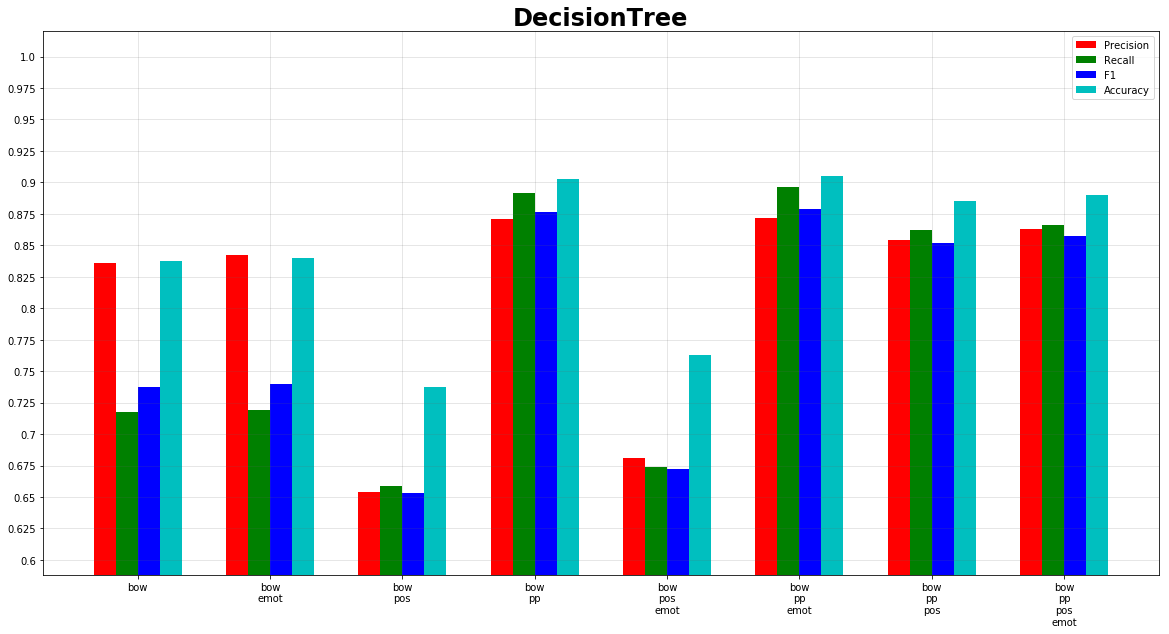

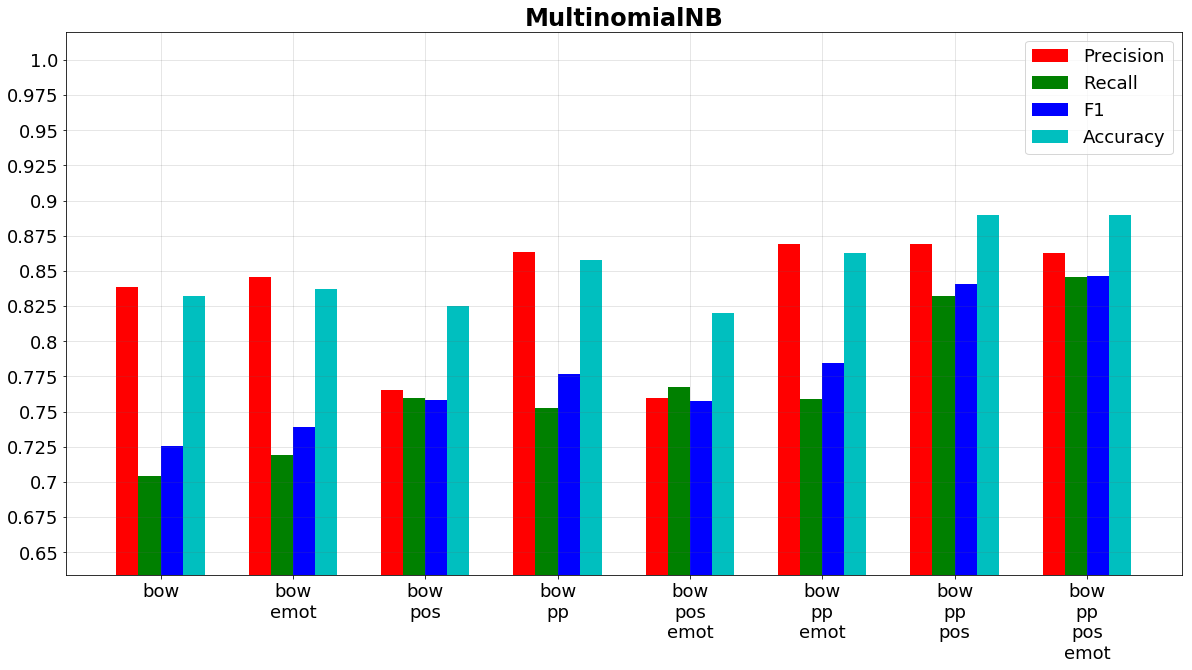

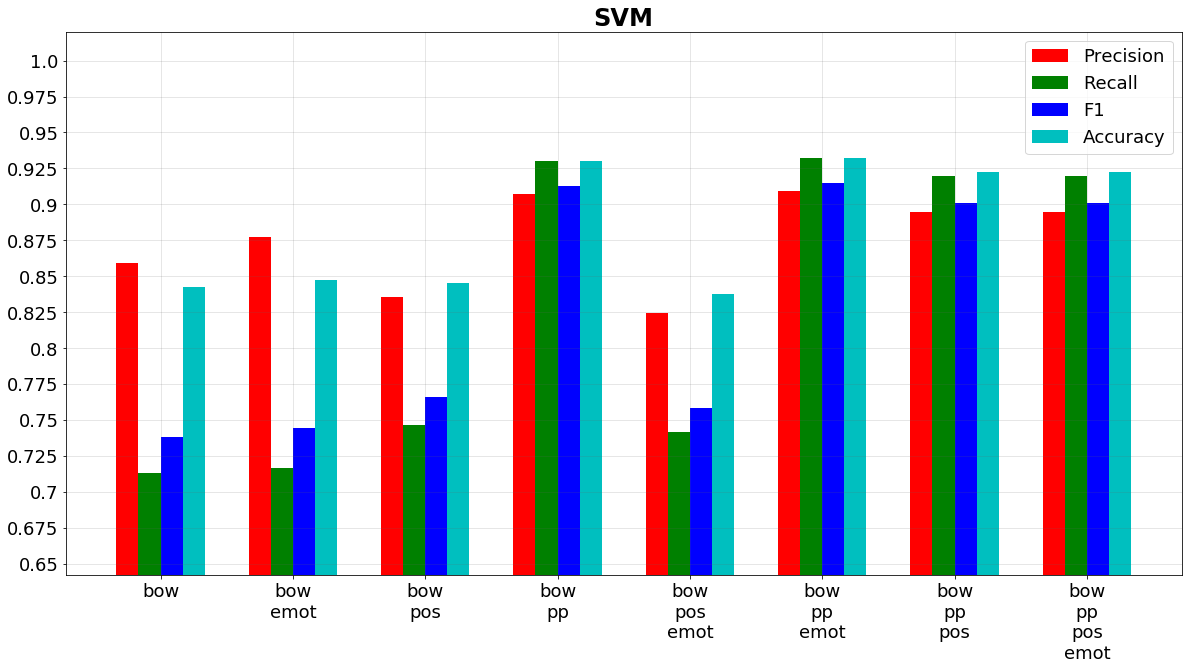

In [233]:
for classifier in df['classifier'].unique():
	values = evaluate_features_data(classifier)
	plot_features(values, classifier)
	

Evaluate emotions data

In [270]:
reports_list = ['{}.precision', '{}.recall', '{}.f1-score']
features_list = ['bow', 'bow-pos', 'bow-pp', 'bow-pp-pos', 'bow-pp-pos-emot']

def evaluate_emotions_data(classifier):
	reports = [r.format('False') for r in reports_list] + [r.format('True') for r in reports_list]
	
	plot_values = []
	for report in reports:
		values = []
		for feature in features_list:
			value = df[((df['features'] == feature) & (df['classifier'] == classifier))][report]
			values.append(float(value))
		plot_values.append(values)
	plot_values = np.transpose(np.array(plot_values))
	return plot_values

def plot_emotions(plot_values, classifier):
	# Figure
	fig, ax = plt.subplots(figsize=(20, 10))
	bar_width = 0.35
	# Axis idx
	indx = np.arange(len(reports_list) * 2) * 3
	yndx = [round(x, 3) for x in np.arange(0, 1.025, 0.025)]
	# Data
	plt.bar(indx + bar_width * 0, plot_values[0], color='r', width=bar_width, label='bow')
	plt.bar(indx + bar_width * 1, plot_values[1], color='g', width=bar_width, label='bow-pos')
	plt.bar(indx + bar_width * 2, plot_values[2], color='b', width=bar_width, label='bow-pp')
	plt.bar(indx + bar_width * 3, plot_values[3], color='c', width=bar_width, label='bow-pp-pos')
	plt.bar(indx + bar_width * 4, plot_values[4], color='y', width=bar_width, label='bow-pp-pos-emot')
	# X axis
	ax.set_xticks(indx + bar_width * 2)
	names = ['Precision{}','Recall{}', 'F1{}']
	x_labels = [feature.format('-') for feature in names] + [feature.format('+') for feature in names] 
	ax.set_xticklabels(x_labels)
	# Y axis
	ax.set_yticks(yndx)
	ax.set_yticklabels(yndx)
	min_value = np.min(plot_values)
	plt.ylim(min_value - min_value * 0.1, 1.15)
	# Legend
	ax.legend()
	# Font
	plt.rc('font', size=18)
	plt.rc('axes', titlesize=18)
	title = '{}'.format(classifier, 'Non ' if type == 'False' else '')
	plt.title(title, fontdict={'size': 24, 'weight':'bold'})
	plt.grid(b=True, color='#666666', linestyle='-', alpha=0.2)

	# Show
	plt.show()

## Emotion features

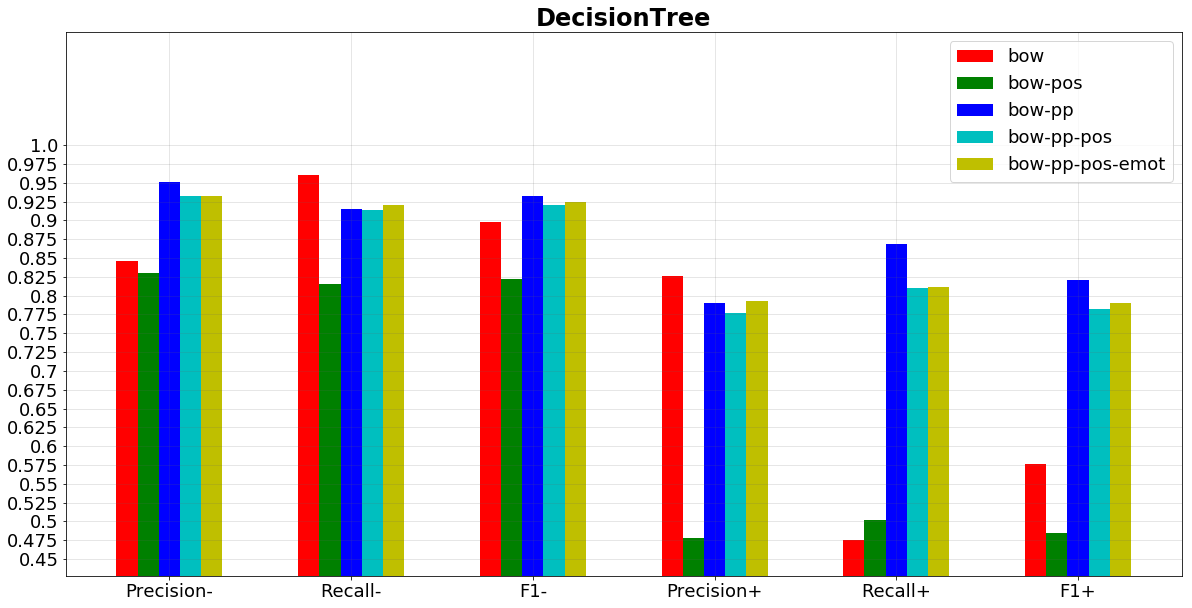

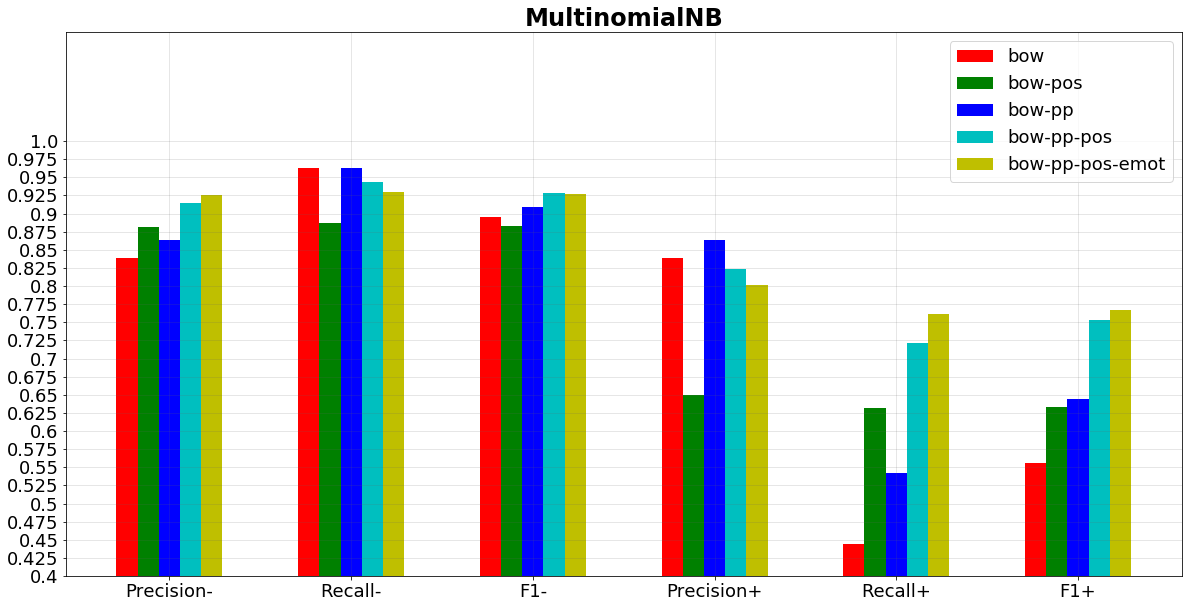

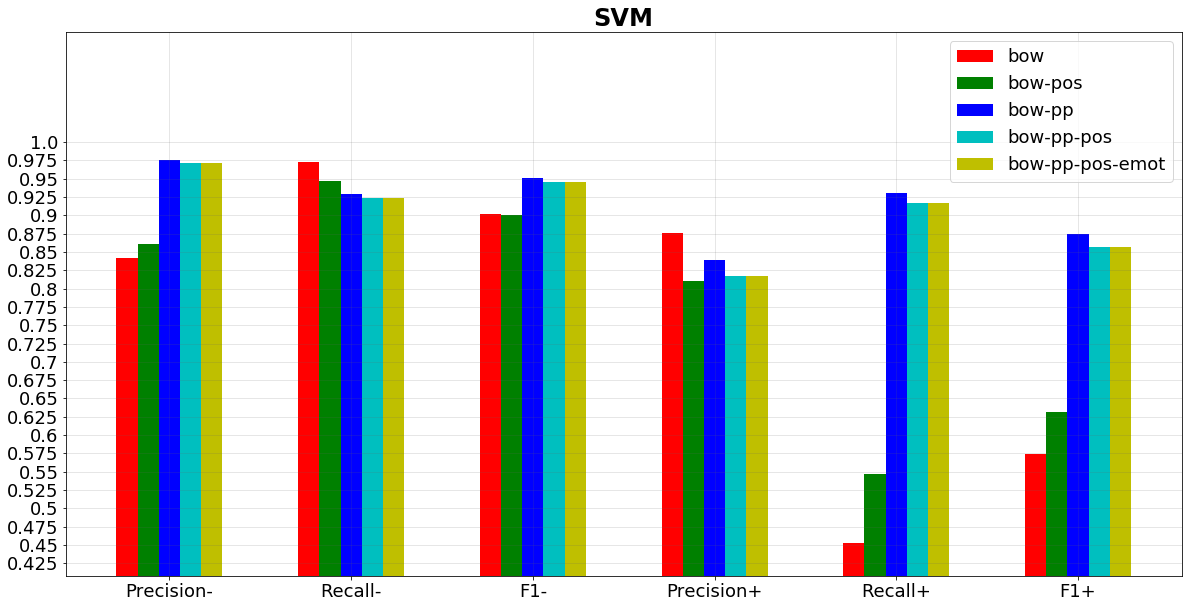

In [271]:
for classifier in df['classifier'].unique():
	emotions_data = evaluate_emotions_data(classifier)
	plot_emotions(emotions_data, classifier)